In [18]:

!pip install pydrive
!git clone https://github.com/thtrieu/darkflow.git
!pip install Cython 
!pip install pytube
!pip install PyDrive

import os
os.chdir('/content/darkflow')
!pwd

!pip install -e .

fatal: destination path 'darkflow' already exists and is not an empty directory.
/content/darkflow
Obtaining file:///content/darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.
  Running setup.py develop for darkflow


In [0]:
import pydrive
import time
from tqdm import tqdm
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# load training weights

newpath = '/content/darkflow/bin'
if not os.path.exists(newpath):
  os.makedirs(newpath)

download = drive.CreateFile({'id': '1ujLul23MzNSk2yTIAhHiKoNqNvJy_er0'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/bin/yolo.weights')

In [0]:
newpath = '/content/darkflow/cfg'
if not os.path.exists(newpath):
  os.makedirs(newpath)

download = drive.CreateFile({'id': '14IjctVn2K5lTLNJ2yLiErLWUR5kWDqrv'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/cfg/yolo_custom.cfg')

In [21]:
!cat labels.txt

spall


In [0]:
download = drive.CreateFile({'id': '1yyKyTwXgeYH8rr4RAztug2VMN9rhvwtf'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/labels.txt')

In [0]:
!mkdir ckpt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
import numpy as np

In [0]:
options = {"model": "cfg/yolo_custom.cfg", 
           "load": "bin/yolo.weights",
           "batch": 8,
           "epoch": 500,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/drive/My Drive/lbl/",
           "dataset": "/content/drive/My Drive/cdata/"}

In [43]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo_custom.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.010980844497680664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,

In [44]:
tfnet.train()


cfg/yolo_custom.cfg parsing /content/drive/My Drive/lbl/
Parsing for ['spall'] 
[====================>]100%  00013spall_resized.xml
Statistics:
spall: 113
Dataset size: 61
Dataset of 61 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 8
	Epoch number  : 500
	Backup every  : 2000
step 1 - loss 228.69378662109375 - moving ave loss 228.69378662109375
step 2 - loss 228.02670288085938 - moving ave loss 228.62707824707033
step 3 - loss 224.91799926757812 - moving ave loss 228.2561703491211
step 4 - loss 222.8248291015625 - moving ave loss 227.71303622436525
step 5 - loss 222.21041870117188 - moving ave loss 227.1627744720459
step 6 - loss 221.38803100585938 - moving ave loss 226.58530012542724
step 7 - loss 219.80093383789062 - moving ave loss 225.9068634966736
Finish 1 epoch(es)
step 8 - loss 218.8857421875 - moving ave loss 225.20475136575624
step 9 - loss 218.96200561523438 - moving ave loss 224.58047679070407
step 10 - loss 217.01541137695312 - moving ave loss 2

In [0]:
tfnet.savepb()

In [0]:
options = {"model": "cfg/yolo_custom.cfg",
           "load": -1,
           "gpu": 1.0}

In [47]:

tfnet2 = TFNet(options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.00014448165893554688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76

In [48]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_custom-3500
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom-3500


In [49]:
import pprint as pp

original_img = cv2.imread("/content/drive/My Drive/cdata/00006spall_resized.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[]


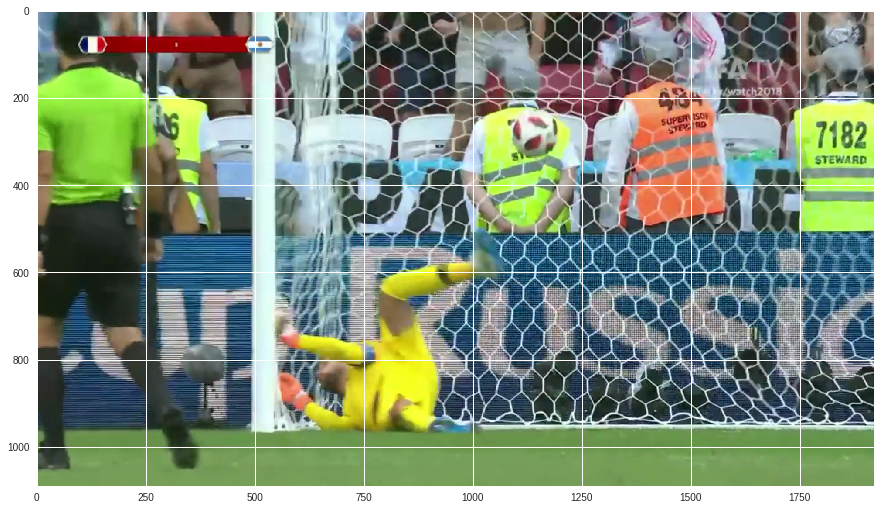

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)
plt.show()

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

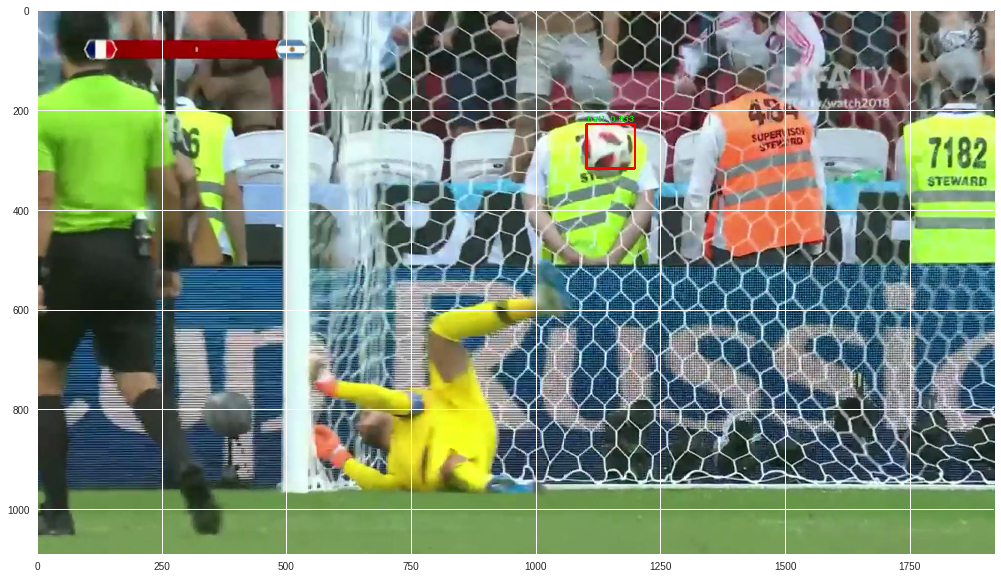

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))
plt.show()

In [0]:
original_img = cv2.imread("/content/drive/My Drive/sccr/images/scene19581.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'ball', 'confidence': 0.81637675, 'topleft': {'x': 1033, 'y': 611}, 'bottomright': {'x': 1136, 'y': 703}}]


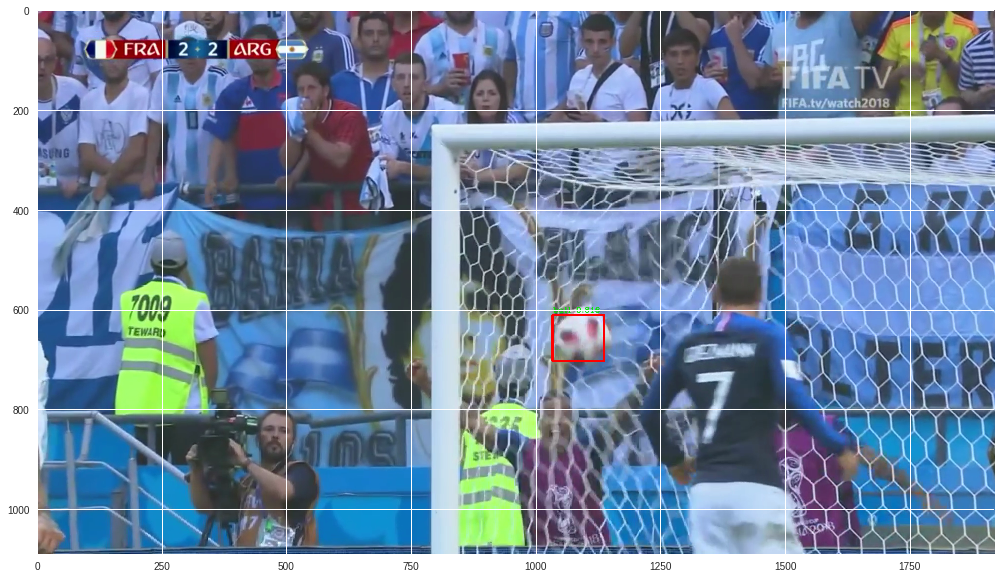

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))
plt.show()